# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [52]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha


In [53]:
# Your code here
def alpha_func(D, idx):
    Sepal_length = D['Sepal.Length'][idx]
    Sepal_width = D['Sepal.Width'][idx]
    alpha = Sepal_length * Sepal_width
    return alpha

In [54]:
print(df['Sepal.Length'][0])


5.1


Test the code below

In [55]:
alpha_func(df, range(100))

0     17.85
1     14.70
2     15.04
3     14.26
4     18.00
      ...  
95    17.10
96    16.53
97    17.98
98    12.75
99    15.96
Length: 100, dtype: float64

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [56]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

85    20.40
63    17.69
51    20.48
26    17.00
30    14.88
      ...  
62    13.20
4     18.00
8     12.76
37    17.64
83    16.20
Length: 100, dtype: float64

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

iii  
The calculation provides a basic measure of central tendency, which is used to calculate the average length of Sepal in the dataset. However, the reason is insufficient because of the estimation uncertainty. The calculation is an estimate of the actual population mean. Second, the sample is too small to generate accurate results. Therefore, a large sample is needed to perform a bootstrap to provide a robust estimator of the population mean. In addition, we may require confidence in estimates, which can tell us how close to the population mean.



In [58]:
# Add your code here to set the seed

bootstrap_values = []

def boot_SE(D, B, seed):
    rng = np.random.default_rng(seed)
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))



_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [59]:
# Your code here
alpha_SE = boot_SE(D=df,
                   B=1000,
                   seed=0)
alpha_SE

3.345571828426105

_(vi)_ What is the original mean value of `Sepal.Length`?

Next, let's create a new bootstrapping to bootstrap samples (boot_se_samples) of Sepal.Length, in order to compute its bootstrapped mean and standard deviation.

(vii). Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using t_range = np.ptp(boot_se_samples).

In [60]:
# Add your code here
original_mean = df['Sepal.Length'].mean()
print("Original Mean of Sepal.Length:", original_mean)


Original Mean of Sepal.Length: 5.843333333333334


In [63]:
import numpy as np
import pandas as pd

def bootstrap_means(data, n_samples):
    boot_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_samples)]
    return np.array(boot_means)


original_mean = df['Sepal.Length'].mean()
boot_se_samples = bootstrap_means(df['Sepal.Length'], 1000)
bootstrapped_mean = np.mean(boot_se_samples)
bootstrapped_std = np.std(boot_se_samples, ddof=1)
bootstrapped_range = np.ptp(boot_se_samples)

print(f"Original Mean of Sepal.Length: {original_mean:.3f}")
print(f"Bootstrapped Mean: {bootstrapped_mean:.3f}")
print(f"Bootstrapped Standard Deviation: {bootstrapped_std:.3f}")
print(f"Range of Bootstrapped Means: {bootstrapped_range:.3f}")




Original Mean of Sepal.Length: 5.843
Bootstrapped Mean: 5.842
Bootstrapped Standard Deviation: 0.068
Range of Bootstrapped Means: 0.452


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [64]:
# Add your code here
import numpy as np
confidence_interval = np.percentile(boot_se_samples, [2.5, 97.5])
print(f"95% Confidence Interval for the Mean Value of Iris Petal Length: {confidence_interval[0]:.3f} to {confidence_interval[1]:.3f}")


95% Confidence Interval for the Mean Value of Iris Petal Length: 5.713 to 5.982


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

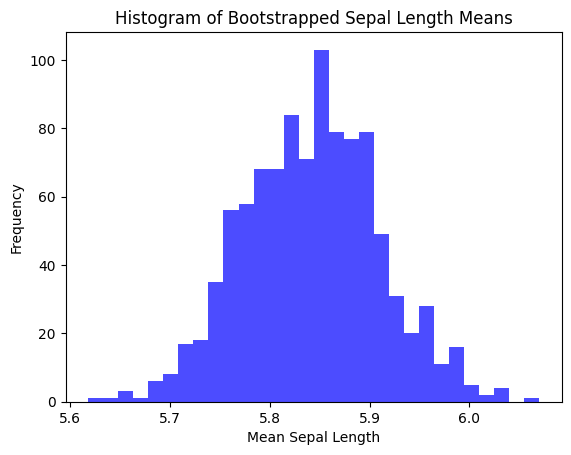

In [65]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boot_se_samples, bins=30, color='blue', alpha=0.7)

# Add a title
#Add your code here
ax.set_title('Histogram of Bootstrapped Sepal Length Means')


# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Mean Sepal Length')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here


Following the statistical analysis of Iris Sepal lengths, I recommend that the shipping company utilize the average bootstrapped mean of about 5.9 as the standard for sizing packaging compartments. This approach will ensure that most products are accommodated effectively, optimizing space usage and minimizing damage risk. Based on the graph, I also advise designing flexible packaging that can adjust to slight size variations. Also, for outliers, based on the product's specialty, additional packing materials or adaptable compartment sizes should be included to safeguard against potential damage during transit.
In addition, we can also take action. For example, we can utilize measures that will reduce wastage, lower costs, and improve customer satisfaction by ensuring the quality of delivered iris flowers.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
